# Assignment

In [1]:
link = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates"
#     Year	Physics	Chemistry	Physiologyor Medicine	Literature	Peace	Economics

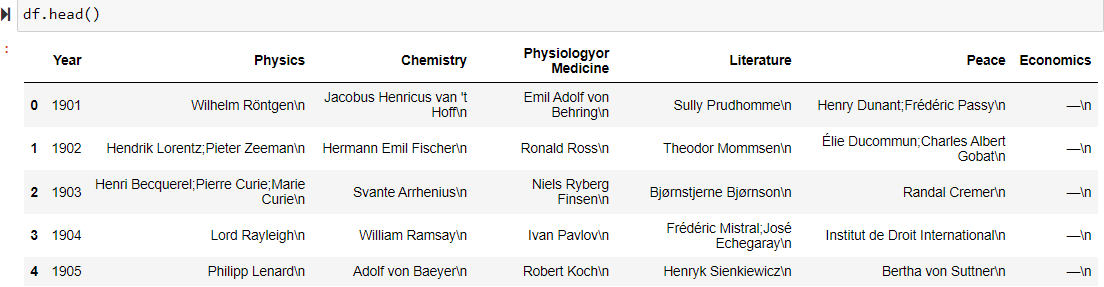

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
link = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates"
response = requests.get(link)
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
tables = soup.find_all('table', {'class': 'wikitable'})
tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Year
 </th>
 <th width="17%"><a href="/wiki/List_of_Nobel_laureates_in_Physics" title="List of Nobel laureates in Physics">Physics</a>
 </th>
 <th width="18%"><a href="/wiki/List_of_Nobel_laureates_in_Chemistry" title="List of Nobel laureates in Chemistry">Chemistry</a>
 </th>
 <th width="17%"><a href="/wiki/List_of_Nobel_laureates_in_Physiology_or_Medicine" title="List of Nobel laureates in Physiology or Medicine">Physiology<br/>or Medicine</a>
 </th>
 <th width="16%"><a href="/wiki/List_of_Nobel_laureates_in_Literature" title="List of Nobel laureates in Literature">Literature</a>
 </th>
 <th width="16%"><a href="/wiki/List_of_Nobel_Peace_Prize_laureates" title="List of Nobel Peace Prize laureates">Peace</a>
 </th>
 <th width="15%"><a class="mw-redirect" href="/wiki/List_of_Nobel_laureates_in_Economics" title="List of Nobel laureates in Economics">Economics</a><br/>(The Sveriges Riksbank Prize)<sup class="reference" id="cite_ref-13

In [11]:
with open("data science jobs.csv", mode='w', encoding="utf-8") as fd:
    fd.write("Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Economics\n")
    nobel_laureates_data = []
    for table in tables:
        # Extract rows
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip the header row
            columns = row.find_all(['th', 'td'])

            # Extract data from columns if they exist
            year = columns[0].text.strip()

            # Use the length of columns to determine if each field exists, and extract the text accordingly
            if len(columns) > 1:
                physics = columns[1].text.strip()
            else:
                physics = ""

            if len(columns) > 2:
                chemistry = columns[2].text.strip()
            else:
                chemistry = ""

            if len(columns) > 3:
                medicine = columns[3].text.strip()
            else:
                medicine = ""

            if len(columns) > 4:
                literature = columns[4].text.strip()
            else:
                literature = ""

            if len(columns) > 5:
                peace = columns[5].text.strip()
            else:
                peace = ""

            if len(columns) > 6:
                economics = columns[6].text.strip()
            else:
                economics = ""

            # Append data to the list
            nobel_laureates_data.append({
                'Year': year,
                'Physics': physics,
                'Chemistry': chemistry,
                'Physiology or Medicine': medicine,
                'Literature': literature,
                'Peace': peace,
                'Economics': economics
            })
            fd.write(f"\"{year}\",\"{physics}\",\"{chemistry}\",\"{medicine}\",\"{literature}\",\"{peace}\",\"{economics}\"\n")



In [9]:
import pandas as pd
nobel_laureates_df = pd.DataFrame(nobel_laureates_data)
nobel_laureates_df


,Year,Physics,Chemistry,Physiology or Medicine,Literature,Peace,Economics
0,1901,Wilhelm Röntgen,Jacobus Henricus van 't Hoff,Emil von Behring,Sully Prudhomme,Henry Dunant;Frédéric Passy,—
1,1902,Hendrik Lorentz;Pieter Zeeman,Emil Fischer,Ronald Ross,Theodor Mommsen,Élie Ducommun;Charles Albert Gobat,
2,1903,Henri Becquerel;Pierre Curie;Marie Curie,Svante Arrhenius,Niels Ryberg Finsen,Bjørnstjerne Bjørnson,Randal Cremer,
3,1904,Lord Rayleigh,William Ramsay,Ivan Pavlov,Frédéric Mistral;José Echegaray,Institut de Droit International,
4,1905,Philipp Lenard,Adolf von Baeyer,Robert Koch,Henryk Sienkiewicz,Bertha von Suttner,
...,...,...,...,...,...,...,...
119,2020,Roger Penrose;Reinhard Genzel;Andrea M. Ghez,Emmanuelle Charpentier;Jennifer Doudna,Harvey J. Alter;Michael Houghton;Charles M. Rice,Louise Glück,World Food Programme,Paul Milgrom;Robert B. Wilson
120,2021,Giorgio Parisi;Klaus Hasselmann;Syukuro Manabe,Benjamin List;David MacMillan,David Julius;Ardem Patapoutian,Abdulrazak Gurnah,Maria Ressa;Dmitry Muratov,David Card;Joshua Angrist;Guido Imbens
121,2022,Alain Aspect;John Clauser;Anton Zeilinger,Carolyn Bertozzi;Morten P. Meldal;Karl Barry S...,Svante Pääbo,Annie Ernaux,Ales Bialiatski;Memorial;Centre for Civil Libe...,Ben Bernanke;Douglas Diamond;Philip H. Dybvig
122,2023,Pierre Agostini;Ferenc Krausz;Anne L'Huillier,Moungi Bawendi;Louis E. Brus;Alexey Ekimov,Katalin Karikó;Drew Weissman,Jon Fosse,Narges Mohammadi,Claudia Goldin
